Analyze 3： 
Business topic distribution per Month
Business topic :
Create important vocabularies from high frequency words list from analysis 2:
include:{enron, gas, price, power,company,energy,trading,service,credit}




In [78]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.sentiment.vader
import os
import email
from email.parser import Parser
import nltk
import glob
from email.utils import parsedate_tz
import pathlib
import os
from pathlib import Path
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import string


In [71]:
def returnmaildate(path):                       #mail date
    with open(path, 'r',encoding='utf-8',errors='ignore') as exa:
        content=exa.read()
        email=Parser().parsestr(content)
        t=parsedate_tz(email["date"])
        if t[2]<16:
            q="first"
        else:
            q="second"
        return (str(t[0])+"-"+str(t[1])+"-"+q) 
        

In [70]:
def cleanword(rawcontent):
    wordlist=[i for i in word_tokenize(rawcontent.lower()) if i not in stopwords.words('english') and i not in string.punctuation and i.isalpha()]
    return wordlist

In [72]:
vipfilenamelist=["shapiro-r","dasovich-j","jones-t","kean-s","shackleton-s"]

def vippath(filenamelist):
    vippathlist=[]
    for name in filenamelist:
        vippathlist.append(os.path.dirname(os.getcwd())+"/raw data/maildir/"+name+"/inbox")      
    return vippathlist 

In [73]:
vippath(vipfilenamelist)


['/Users/zifuche/Desktop/midterm/raw data/maildir/shapiro-r/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/dasovich-j/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/jones-t/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/kean-s/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/shackleton-s/inbox']

In [74]:
def getallfile(path):                         #get files path according to dir path
    allfiles=[os.path.join(root,fn) for root,dirs,files in os.walk(path) for fn in files if fn.endswith(".")] 
    return (allfiles)

In [67]:
returnmaildate(os.path.dirname(os.getcwd())+"/raw data/maildir/allen-p/_sent_mail/12.")

'2001-5-first'

In [75]:
def getemailcontent(path):                             #get email according path
    with open(path, 'r',encoding='utf-8',errors='ignore') as ex:      
        content = ex.read()
        email=Parser().parsestr(content)
        return(email.get_payload())

In [76]:
def getallemailwordslist(path,date):
    wordlist=[]
    filespath=getallfile(path)
    for eachfilepath in filespath:
        if returnmaildate(eachfilepath)==date:         
            words=cleanword(getemailcontent(eachfilepath))
            wordlist.extend(words)
    return wordlist 

In [87]:
def getwordpermonth(date):
    wordbase=[]
    for path in vippath(vipfilenamelist):
        wordbase.extend(getallemailwordslist(path,date))
    return wordbase    


In [91]:
datelist=["2001-7-first","2001-7-second","2001-8-first","2001-8-second","2001-9-first","2001-9-second","2001-10-first","2001-10-second","2001-11-first","2001-11-second","2001-12-first","2001-12-second","2002-1-first","2002-1-second","2002-2-first","2002-2-second","2002-3-first","2002-3-second"]




In [92]:
def caculateword(wordlist):
    q=wordlist.count("enron")+wordlist.count("gas")+wordlist.count("price")+wordlist.count("power")+wordlist.count("company")+wordlist.count("energy")+wordlist.count("trading")+wordlist.count("service")+wordlist.count("credit")
    return q


In [94]:
dic={}
for date in datelist:
    dic[date]=caculateword(getwordpermonth(date))
    
    
    
    
    

In [95]:
dic

{'2001-10-first': 5450,
 '2001-10-second': 10764,
 '2001-11-first': 8047,
 '2001-11-second': 2431,
 '2001-12-first': 311,
 '2001-12-second': 581,
 '2001-7-first': 0,
 '2001-7-second': 589,
 '2001-8-first': 5,
 '2001-8-second': 218,
 '2001-9-first': 3248,
 '2001-9-second': 3911,
 '2002-1-first': 89,
 '2002-1-second': 279,
 '2002-2-first': 168,
 '2002-2-second': 139,
 '2002-3-first': 179,
 '2002-3-second': 109}

In [101]:
Times=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
WordFreq=[0,589,5,218,3248,3911,5450,10764,8047,2431,311,581,89,279,168,139,179,109]

In [99]:
import matplotlib.pyplot as pltl
%matplotlib inline

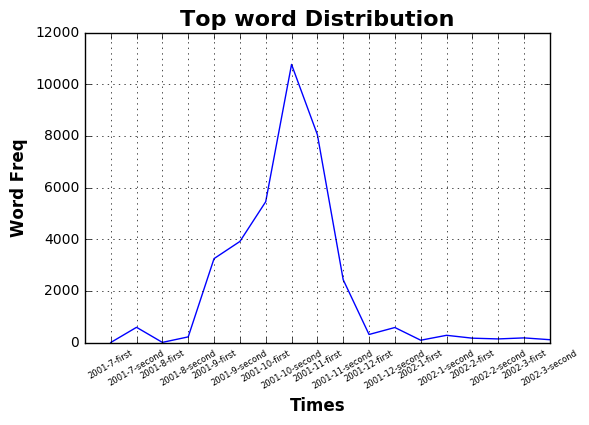

In [112]:
my_xticks=['2001-7-first','2001-7-second','2001-8-first','2001-8-second','2001-9-first','2001-9-second','2001-10-first','2001-10-second','2001-11-first','2001-11-second','2001-12-first','2001-12-second','2002-1-first','2002-1-second','2002-2-first','2002-2-second','2002-3-first','2002-3-second']
pltl.plot(Times,WordFreq)
pltl.title("Top word Distribution",fontsize=16,fontweight="bold")
pltl.xlabel("Times",fontsize=12,fontweight="bold")
pltl.xticks(Times,my_xticks,rotation=30,fontsize=6)
pltl.ylabel("Word Freq",fontsize=12,fontweight="bold")
pltl.grid(True)
pltl.show()